In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

In [29]:
data_frame = pd.read_csv("/Users/sriramkurnella/AI/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv")

In [50]:
data_frame.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


Text(0, 0.5, 'Salary')

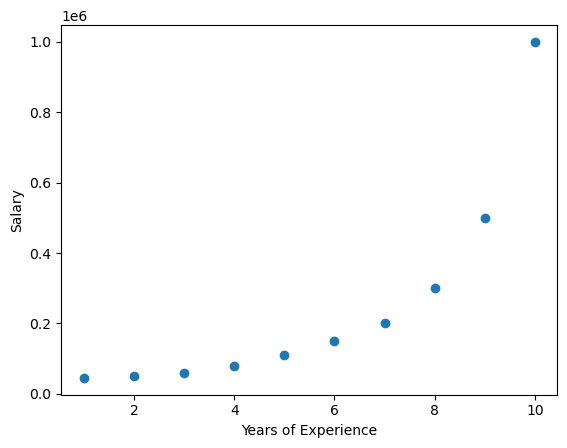

In [31]:
plt.scatter(data_frame["Level"] , data_frame["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

In [32]:
feature_vector = [data_frame['Level'].tolist()]
result_vector = [data_frame['Salary'].tolist()]

In [84]:
def hypothesis(theta_vector , features , index):
    hyp_index = theta_vector[0]
    for i in range(0 , len(features)) :
        hyp_index += features[i][index] * theta_vector[i+1]
    
    return hyp_index

In [117]:
def weight(feature_vector , bandwidth , index) :
    point_of_prediction = 9
    weight_at_prediction_point = math.exp(-((feature_vector[0][index] - point_of_prediction)**2 / (2 * (bandwidth ** 2))))

    return weight_at_prediction_point
    

In [86]:
def theta_not(initial_val , result_vector , feature_vector , theta_vector ,  learning_rate):
    error = 0
    for index in range(len(result_vector[0])):
        error += weight(feature_vector , 5 , index) * (hypothesis(theta_vector , feature_vector , index) - result_vector[0][index])
    new_theta_not = initial_val - learning_rate * error
    return new_theta_not

In [87]:
def theta_feature(initial_val ,feature_index , result_vector , feature_vector , theta_vector , learning_rate):
    error = 0
    for index in range(len(result_vector[0])) :
        error += weight(feature_vector , 5 , index) * (hypothesis(theta_vector , feature_vector , index) - result_vector[0][index]) * feature_vector[feature_index][index]
    new_theta_feature = initial_val - learning_rate * error
    return new_theta_feature

In [118]:
initial_theta_exp = 5
initial_theta_not = 5
learning_rate = 0.001
cycles = 1000

In [119]:
for _ in range(cycles):
    current_theta = [initial_theta_not, initial_theta_exp]
    initial_theta_not = theta_not(current_theta[0], result_vector, feature_vector, current_theta, learning_rate)
    initial_theta_exp = theta_feature(current_theta[1], 0 , result_vector, feature_vector, current_theta, learning_rate)

In [120]:
initial_theta_not

-191772.75556442467

In [121]:
initial_theta_exp

80788.47860478325

In [90]:
result_for_9 = []

for i in range(len(result_vector[0])) :
    result_for_9.append(hypothesis((initial_theta_not,initial_theta_exp) , feature_vector , i))

In [94]:
result_for_3 = []

for i in range(len(result_vector[0])) :
    result_for_3.append(hypothesis((initial_theta_not,initial_theta_exp) , feature_vector , i))

In [98]:
result_for_5dot5 = []

for i in range(len(result_vector[0])) :
    result_for_5dot5.append(hypothesis((initial_theta_not,initial_theta_exp) , feature_vector , i))

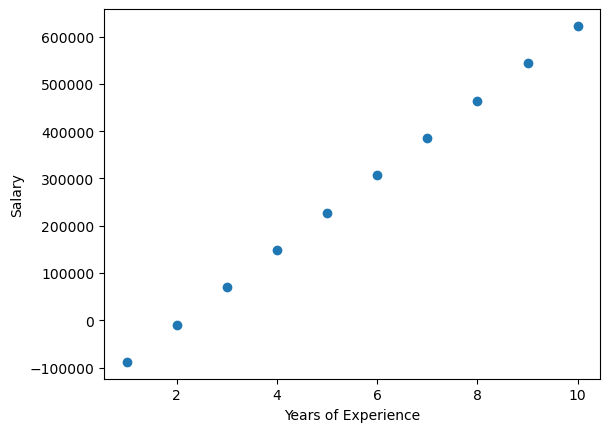

In [76]:
plt.scatter(data_frame["Level"] , result)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

In [51]:
dataset = pd.read_csv("/Users/sriramkurnella/AI/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv")
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, -1].values

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [53]:
X_test

array([ 3,  9,  5, 10])

In [55]:
from sklearn.linear_model import LinearRegression

# Reshape X_train and X_test to be 2D arrays
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = regressor.predict(X_test)

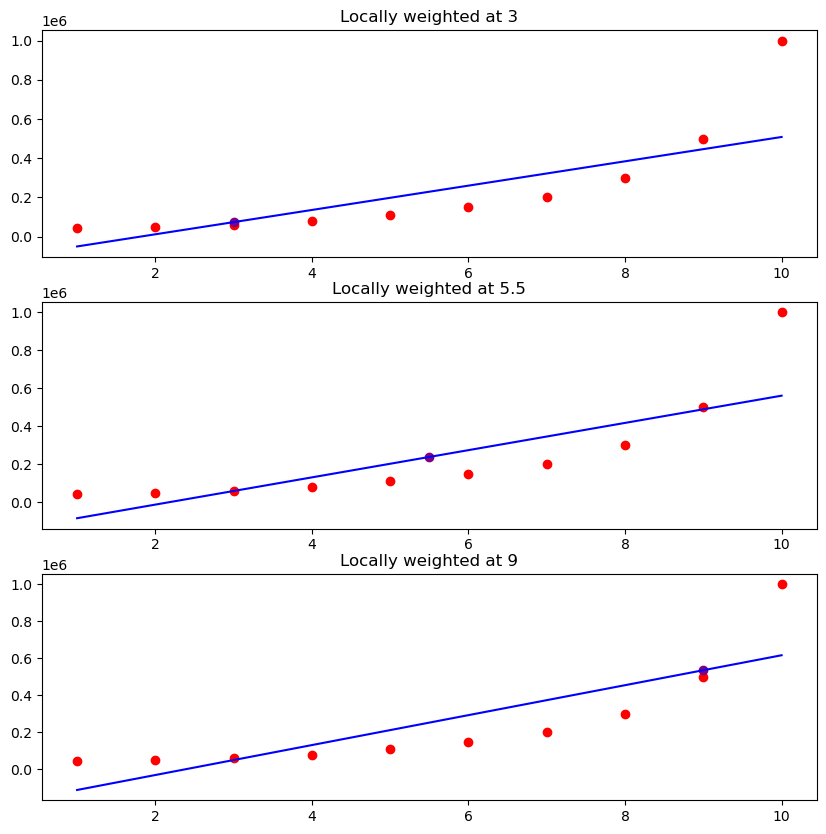

In [122]:
fig , axes = plt.subplots(3 , 1 ,figsize = (10 , 10))

axes[0].set_title("Locally weighted at 3")
axes[0].plot(data_frame["Level"] , result_for_3 , c = "blue")
axes[0].scatter(data_frame["Level"] , data_frame["Salary"] , c = "red")
axes[0].scatter(3 , 73534.72034 , c="purple")

axes[1].set_title("Locally weighted at 5.5")
axes[1].plot(data_frame["Level"] , result_for_5dot5 , c = "blue")
axes[1].scatter(data_frame["Level"] , data_frame["Salary"] , c = "red")
axes[1].scatter(5.5 , 237791.4795 , c="purple")

axes[2].set_title("Locally weighted at 9")
axes[2].plot(data_frame["Level"] , result_for_9 , c = "blue")
axes[2].scatter(data_frame["Level"] , data_frame["Salary"] , c = "red")
axes[2].scatter(9 , 535323.5519 , c="purple")

